# <b>Google Play Store Apps Analysis</b>

## 1. Google Play Store apps and reviews
<p>Everyone in the world make use of mobiles , laptops . To run any application on mobile & laptop we have too install them from playstore ,  Microsoft store and any other site.In this project i have analysis for the various parameter that affect the apps on the play store.</p>
<p><img src="https://assets.datacamp.com/production/project_619/img/google_play_store.png" alt="Google Play logo"></p>
<p>Let's take a look at the data, which consists of two files:</p>
<ul>
<li><code>apps.csv</code>: contains all the details of the applications on Google Play. There are 13 features that describe a given app.</li>
<li><code>user_reviews.csv</code>: contains 100 reviews for each app, <a href="https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/">most helpful first</a>. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.</li>
</ul>

In [63]:
# Read the dataset
import pandas as pd
apps_with_duplicates = pd.read_csv("datasets/apps.csv")

# Drop duplicates from apps_with_duplicates
apps = apps_with_duplicates.drop_duplicates()

# Total number of apps present in dataset
print('Total number of apps in the dataset = ', apps.shape[0])

# Random apps from dataset
display(apps.sample(5))

Total number of apps in the dataset =  9659


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1639,2098,Extreme Racing 2 - Real driving RC cars game!,FAMILY,4.3,4207,93.0,"500,000+",Free,0,Everyone,Racing;Action & Adventure,"August 31, 2017",1.1.9,4.1 and up
5799,6830,BU Syllabus,FAMILY,4.5,38,6.5,"1,000+",Free,0,Everyone,Education,"September 21, 2017",1.0.3,4.0.3 and up
7941,9060,Dress Up RagazzA13 DX,FAMILY,3.5,13,42.0,100+,Paid,$0.99,Everyone,Simulation,"September 16, 2016",1.0.5,4.0.3 and up
6855,7915,Freedom CU,FINANCE,3.6,117,25.0,"10,000+",Free,0,Everyone,Finance,"June 22, 2018",6.5.82-prod,4.2 and up
8284,9408,Ei Samay - Bengali News Paper,NEWS_AND_MAGAZINES,4.3,20620,NaN,"1,000,000+",Free,0,Everyone,News & Magazines,"July 17, 2018",Varies with device,Varies with device


## 2. Data cleaning
<p>Data cleaning is one of the most essential subtask any data science project.<br>Here In this dataset there is <code>Installs</code>
,<code>Price</code> columns that contains some special characters like '+' , '$' which is not correct so  we have remove such outliers.</p>

In [64]:
# List of outliers to remove
chars_to_remove = ['+' , ',' ,'$']

# List of column names to clean 
cols_to_clean = ["Installs" ,"Price" ]


# Loop for each column in cols_to_clean
for col in cols_to_clean:
    # Loop for each outlier in chars_to_remove
    for char in chars_to_remove:
        # Replace the character with an empty string
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))
        
# Summary of the apps dataframe
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB


## 3. Correcting data types
<p>From the previous task we noticed that <code>Installs</code> and <code>Price</code> has data type  as <code>object</code> data type (and not <code>int</code> or <code>float</code>) as we would like. This is beacuase they were containing special characters.To know more about Pandas data types, click <a href="https://datacarpentry.org/python-ecology-lesson/04-data-types-and-format/">here</a>.</p>


In [65]:
import numpy as np

# Convert Installs to float data type 
apps["Installs"] = apps["Installs"].astype("float64")

# Convert Price to float data type
apps["Price"] = apps["Price"].astype(float)

# Checking data type of the "Installs" & "Price" of apps dataframe
display(apps["Installs"].dtypes)
display(apps["Price"].dtypes)

dtype('float64')

dtype('float64')

## 4. Exploring app categories
<p>With more than 1 billion active users in 190 countries around the world, google play store has numbers of apps and are categorised in various categories.Each apps belongs to any category</p>
<p>This brings us to the following questions:</p>
<ul>
<li>Which category has the highest share of (active) apps in the market? </li>
<li>Is any specific category dominating the market?</li>
<li>Which categories have the fewest number of apps?</li>
</ul>
<p>We will see that there are <code>33</code> unique app categories present in our dataset. <em>Family</em> and <em>Game</em> apps have the highest apps.This says that around the world most of the apps are install for family or gamig purpose.</p>

Number of categories =  33


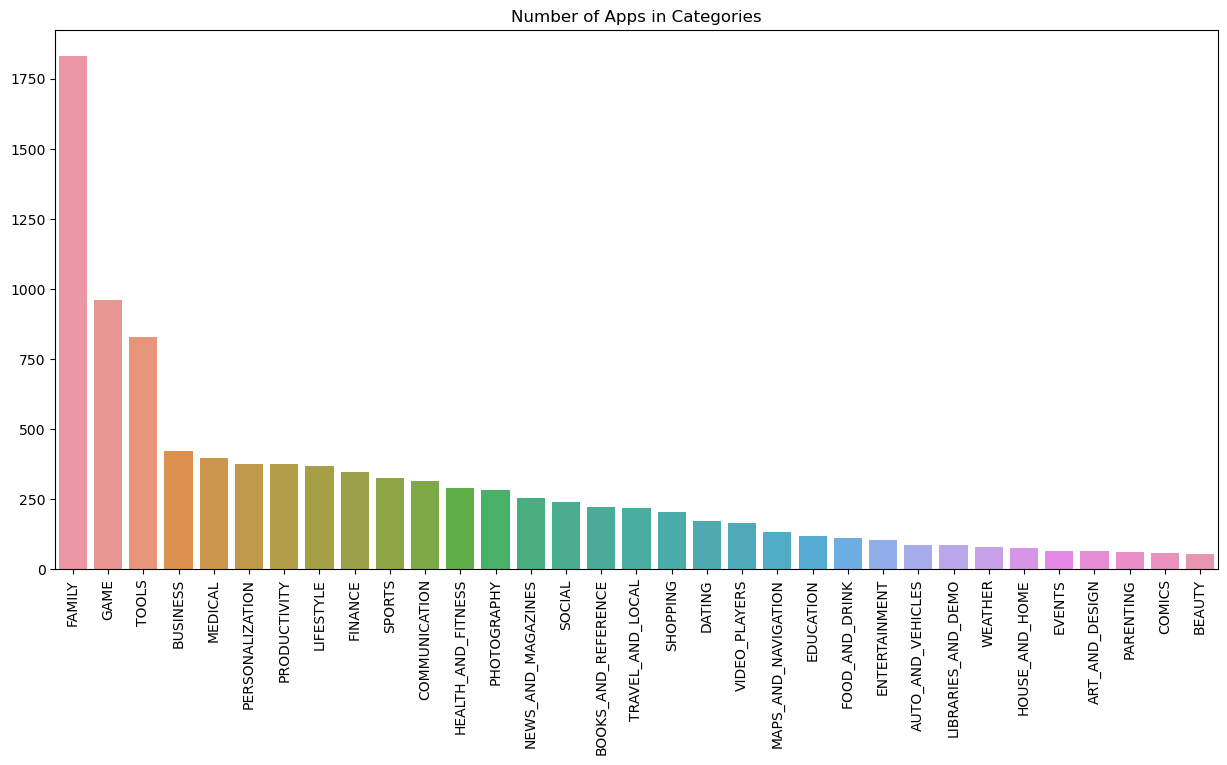

In [66]:
import plotly
import seaborn as sns
import matplotlib.pyplot as plt 

# Total number of unique categories
num_categories = len(set(apps["Category"]))
print('Number of categories = ', num_categories)

# Number of apps in each 'Category'.
num_apps_in_category = apps["Category"].value_counts()


sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending = False)

# Graph for the number of apps in each "Category"
plt.figure(figsize=(15,7))
sns.barplot(x = sorted_num_apps_in_category.index , y = sorted_num_apps_in_category.values)
plt.title("Number of Apps in Categories")
plt.xticks(rotation = 90)
plt.show()

## 5. Distribution of app ratings
<p>After indentifying that which category has more number of apps in market it is needed to analyse about the ratings for the apps</p>
<p>Question Arises :</p>
<li>What is most common rating given by all users accross the world?</li>

Average app rating =  4.173243045387998


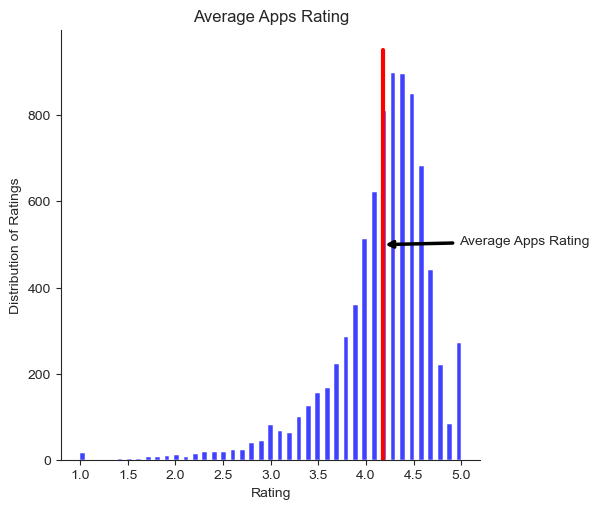

In [110]:
# Average rating of all the apps on Google Play Store
avg_app_rating = apps["Rating"].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
sns.displot( apps["Rating"],color ="blue")
sns.lineplot(x = [avg_app_rating , avg_app_rating] , y = [0,950] , color = "red",estimator = None,linewidth = 3)
plt.annotate("Average Apps Rating",xy = (avg_app_rating , 500),
            xytext = (avg_app_rating + 0.8 , 500) , arrowprops = {"arrowstyle":"->" , "color":"black" , "linewidth":2.5})
plt.title("Average Apps Rating")
plt.ylabel("Distribution of Ratings")
plt.show()


## 6. Size and price of an app
<p>Let's now examine app size and app price.Is it true that Size of App affect its rating.There are many apps on play store having size more than 1gb which does not support the mobile with less RAM.Due to this user with less RAM may get disappoint,does this disappoinment of user affect the apps rating?.There are many paid apps available on play store, many of peoples go for free apps , so is there any profit for the paid apps such that will they have good ratings.</p>
<p>How can we effectively come up with strategies to size and price our app?</p>
<ul>
<li>Does the size of an app affect its rating? </li>
<li>Do users really care about system-heavy apps or do they prefer light-weighted apps? </li>
<li>Does the price of an app affect its rating? </li>
<li>Do users always prefer free apps over paid apps?</li>
</ul>
<p>We find that the majority of top rated apps (rating over 4) range from 2 MB to 20 MB. We also find that the vast majority of apps price themselves under \$10.</p>

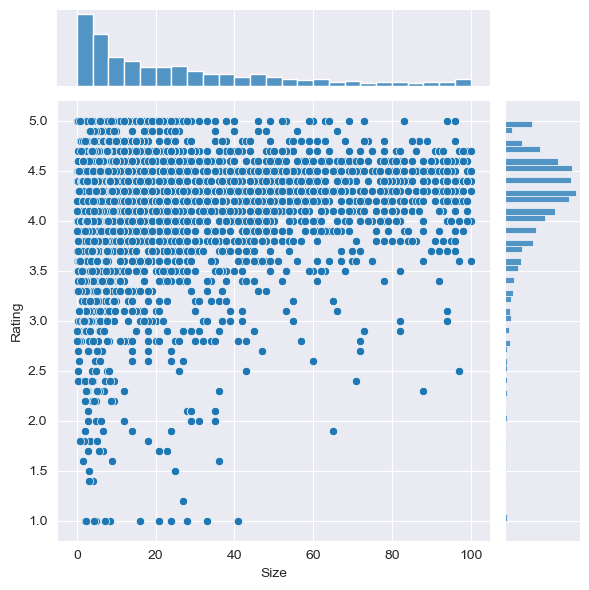

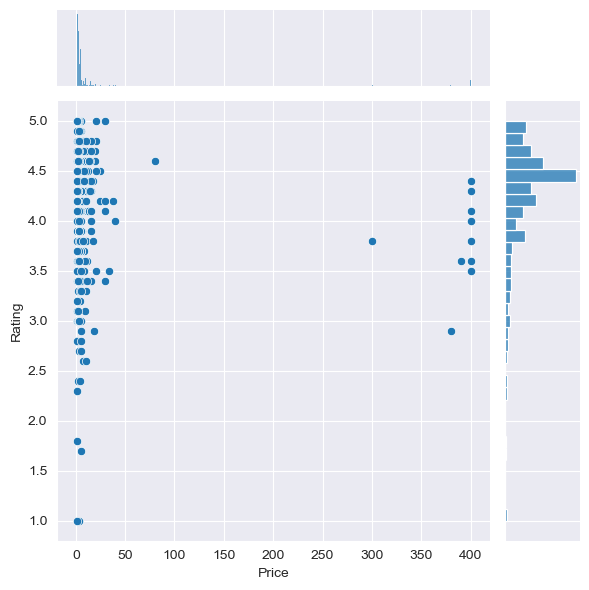

In [113]:
# Style of Graph
sns.set_style("darkgrid")

# Apps whose Rating & Size are not NULL
apps_with_size_and_rating_present = apps.query(' Rating >= 0 and Size >= 0 ')

# Subset for categories having at least more than 250 apps
large_categories = apps_with_size_and_rating_present.groupby("Category").filter(lambda x: len(x) >= 250)

# How the "Size" afftect the "Ratings" of the apps
sns.jointplot(x = large_categories["Size"], y = large_categories["Rating"])
plt.show()
# Select the "Paid" apps from dataset
paid_apps  = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']

# How the "Price" of apps afftect its "Ratings"
sns.jointplot(x = paid_apps["Price"], y = paid_apps["Rating"])
plt.show()

## 7. Relation between app category and app price
<p>Let's have a look at category and price relation.In earlier we saw that <code>Family</code> and <code>Game</code> categories are wwidely used.Is that make sence most <span style="color:DarkSalmon; font-size:20px;"><b>paid</b></span> will also belongs to these two category?</p>
<p>Different categories demand different price ranges.Some of the apps that are simple and daily use should be free like Alarm. Below, we see that <em>Medical and Family</em> apps are the most expensive. Some medical apps extend even up to \$80! All game apps are reasonably priced below $20.</p>

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


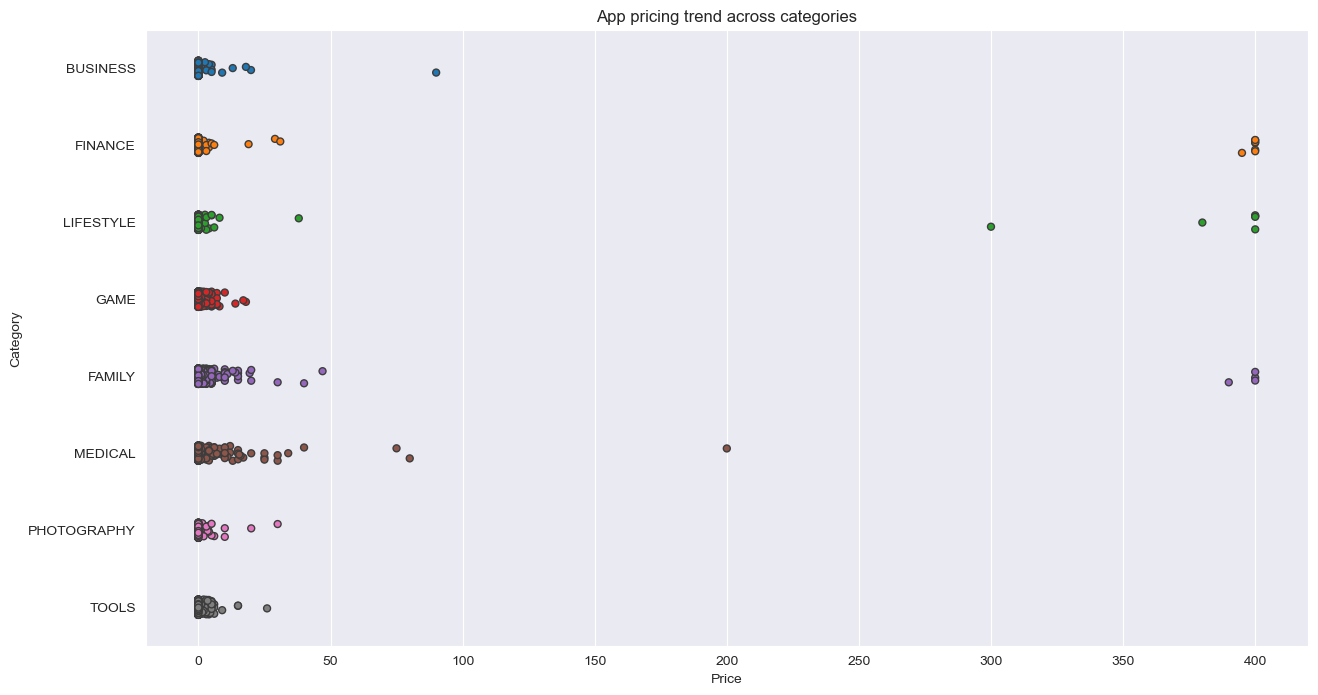

In [114]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Which category has more paid apps by plotting
ax = sns.stripplot(x = popular_app_cats["Price"], y = popular_app_cats["Category"], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[popular_app_cats["Price"] > 200]
apps_above_200[['Category', 'App', 'Price']]

## 8. Filter out "junk" apps
<p>It looks like a junk apps are really expensive.Developers create these junk apps for any joke or earing money beacause sometimes peoples pays for the app without knowing about app.</p>
<p>Let's filter out these junk apps and re-do our visualization.</p>

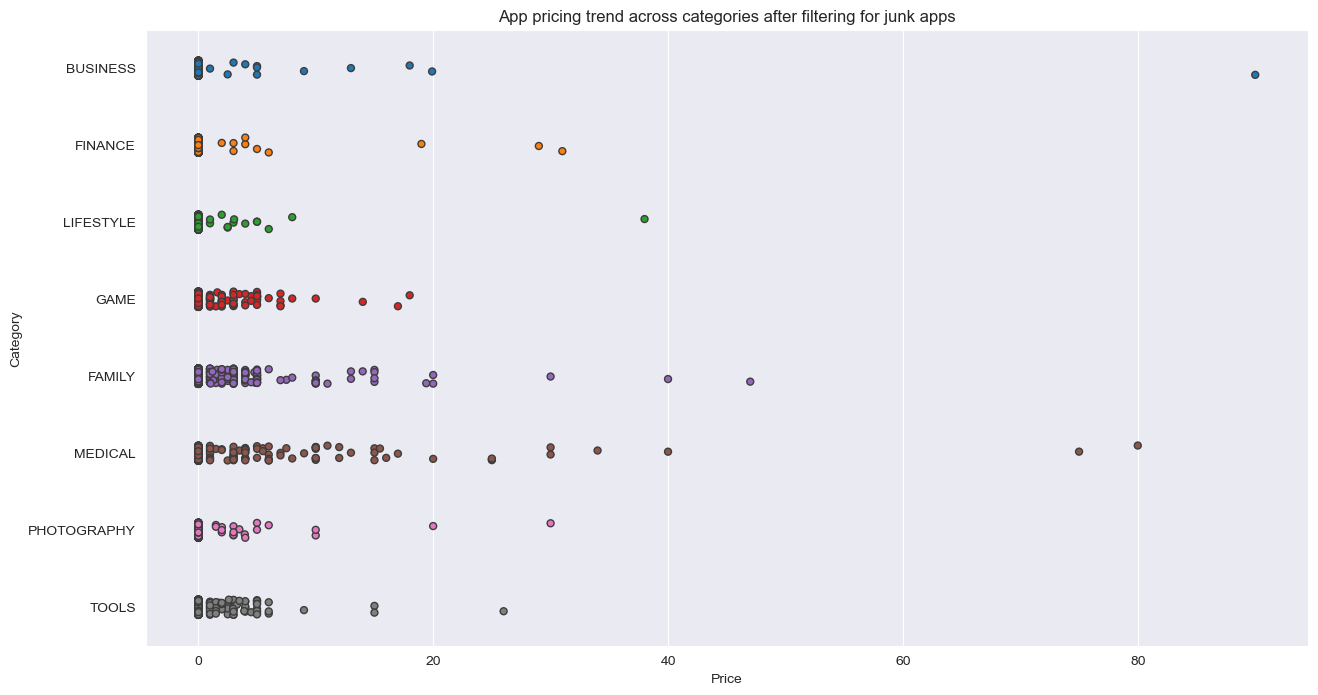

In [115]:
# Select apps priced below $100
apps_under_100 =popular_app_cats[popular_app_cats["Price"]<100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x = apps_under_100["Price"], y = apps_under_100["Category"], data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')
plt.show()

## 9. Popularity of paid apps vs free apps
<p>what do you say which apps will have more popularity <code>Free</code> or <code>Paid</code> apps?</p>
<p>Some characteristics of free apps are:</p>
<ul>
<li>Free to download.</li>
<li>Main source of income often comes from advertisements.</li>
</ul>
<p>Some characteristics of paid apps are:</p>
<ul>
<li>Users are asked to pay once for the app to download and use it.</li>
<li>The user  get a feel for the app after buying it.</li>
</ul>
<p>Are paid apps installed as much as free apps? It turns out that paid apps have a relatively lower number of installs than free apps.</p>

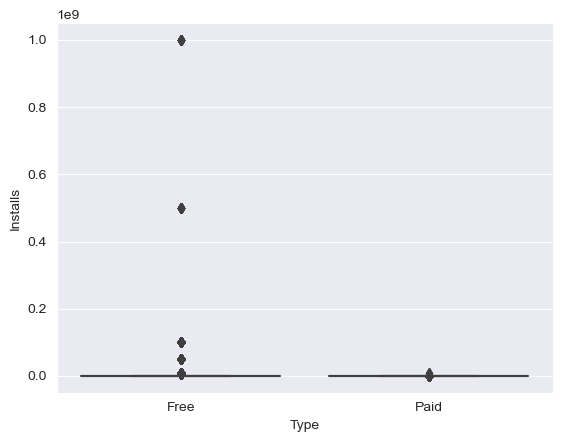

In [121]:
# # Plot for Paid Apps
# paid_apps = go.Box(
#     # Data for paid apps
#     y = apps[apps['Type'] == "Paid"]['Installs'],
#     name = 'Paid'
# )

# # Plot for Free Apps
# free_apps = go.Box(
#     # Data for free apps
#     y = apps[apps['Type'] == "Free"]['Installs'],
#     name = 'Free'
# )

# layout = go.Layout(
#     title = "Number of downloads of paid apps vs free apps",
#     yaxis = dict(title = "Number of downloads",
#                 type = 'log',
#                 autorange = True)
# )

# # Add paid_apps and free_apps to a list for plotting
# data = [paid_apps, free_apps]
# plotly.offline.iplot({'data': data, 'layout': layout})

sns.boxplot(x = "Type" , y = "Installs",data=apps)
plt.show()

## 10. Sentiment analysis of user reviews
<p>Reviews defines the app is really good or bad.positive words in an app review include words such as 'amazing', 'friendly', 'good', 'great', and 'love'. Negative words might be words like 'malware', 'hate', 'problem', 'refund', and 'incompetent'.</p>
<p>By plotting sentiment polarity scores of user reviews for paid and free apps, we observe that free apps receive a lot of negative comments, as indicated by the outliers on the negative y-axis.Reviews for paid apps appear never to be extremely negative. This may indicate something about app quality, i.e., paid apps being of higher quality than free apps on average. The median polarity score for paid apps is a little higher than free apps, thereby syncing with our previous observation.</p>


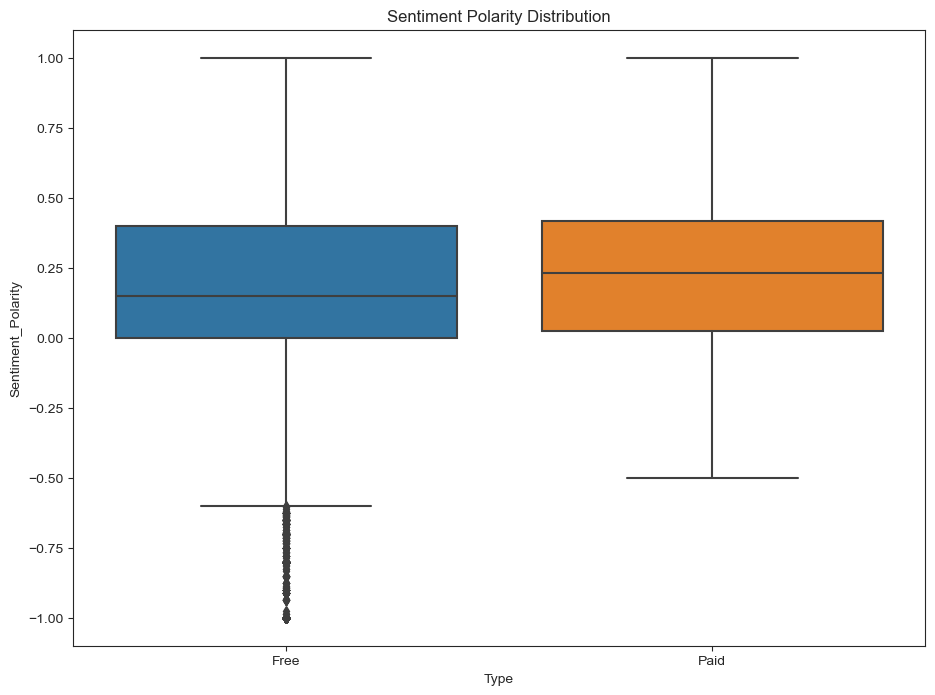

In [72]:
# Read "user_reviews.csv" dataset
reviews_df = pd.read_csv('datasets/user_reviews.csv')

# Join the apps dataframe with its reviews dataframe
merged_df = pd.merge(apps, reviews_df, on = "App")

# Drop NULL values from Sentiment and Review columns
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')
plt.show()

<p>In this notebook, we analyzed over ten thousand apps from the Google Play Store.Now you have an idea that before making any app which things you have to keep in mind as well as in app.</p>
<p style=" font-size:25px; background-color:powderblue;text-align:center; border-radius: 10px 10px 10px 10px;color: transparent;
   text-shadow: 0 0 2px rgba(0,0,0,0.5);"><b>Thank You</b> </p>
         